In [18]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [3]:
def HappyModel(input_shape):
    
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    X_input = Input(input_shape)
    
    X = ZeroPadding2D((3,3))(X_input)
    
    X = Conv2D(32,(7,7),strides=(1,1),name='conv0')(X)
    X = BatchNormalization(axis=3,name='bn0')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model

In [4]:
happyModel = HappyModel(X_train.shape[1:])

In [5]:
happyModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [6]:
happyModel.fit(X_train, Y_train, epochs=40, batch_size=50)

Epoch 1/40
600/600 [==============================] - 7s 11ms/step - loss: 3.0149 - acc: 0.5483
Epoch 2/40
600/600 [==============================] - 7s 12ms/step - loss: 0.7784 - acc: 0.7383
Epoch 3/40
600/600 [==============================] - 7s 12ms/step - loss: 0.2915 - acc: 0.8800
Epoch 4/40
600/600 [==============================] - 8s 13ms/step - loss: 0.1771 - acc: 0.9383
Epoch 5/40
600/600 [==============================] - 6s 10ms/step - loss: 0.1631 - acc: 0.9333
Epoch 6/40
600/600 [==============================] - 6s 11ms/step - loss: 0.1471 - acc: 0.9483
Epoch 7/40
600/600 [==============================] - 7s 12ms/step - loss: 0.1060 - acc: 0.9717
Epoch 8/40
600/600 [==============================] - 6s 11ms/step - loss: 0.1017 - acc: 0.9683
Epoch 9/40
600/600 [==============================] - 7s 12ms/step - loss: 0.0821 - acc: 0.9733
Epoch 10/40
600/600 [==============================] - 8s 13ms/step - loss: 0.0697 - acc: 0.9800
Epoch 11/40
600/600 [==================

In [7]:
preds = happyModel.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)

150/150 [==============================] - 1s 7ms/step


In [8]:
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))


Loss = 0.07319852610429128
Test Accuracy = 0.9733333373069764


(1, 64, 64, 3)
[[1.]]


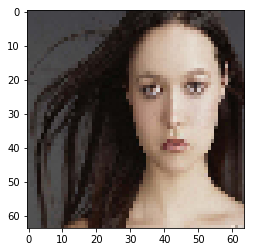

In [20]:
img_path = 'datasets/check8.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)
print(happyModel.predict(x))